In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2015-01-01", "2025-12-01", auto_adjust= True)
data.head()

Enter the code of the stock:  NFLX


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,
2015-01-02,4.984857,5.033143,4.873143,4.915143,134750000
2015-01-05,4.731143,4.925857,4.714714,4.925857,181650000
2015-01-06,4.650143,4.764000,4.566143,4.734714,160377000
2015-01-07,4.674286,4.742143,4.627143,4.734714,98497000
2015-01-08,4.778000,4.783571,4.647857,4.712000,96019000


In [12]:
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2744 entries, 2015-01-02 to 2025-11-28
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NFLX)   2744 non-null   float64
 1   (High, NFLX)    2744 non-null   float64
 2   (Low, NFLX)     2744 non-null   float64
 3   (Open, NFLX)    2744 non-null   float64
 4   (Volume, NFLX)  2744 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 128.6 KB


In [13]:
#cannot use high and low of the day to predict the value as it will not be true prediction since we cannot knwo high and low until the day ends
data["Target"] = data["Close"].shift(-1)
data["Close_lag_1"] = data["Close"].shift(1)
data["Close_lag_5"] = data["Close"].shift(5)
data["MA_5"] = data["Close"].rolling(5).mean()
data["MA_10"] = data["Close"].rolling(10).mean()
data["Return"] = data["Close"].pct_change()
data["Volatility"] = data["Return"].rolling(5).std()
data = data.dropna()
FEATURES = [
    "Open",
    "Volume",
    "Close_lag_1",
    "Close_lag_5",
    "MA_5",
    "MA_10",
    "Volatility"
]

X= data[FEATURES]
y = data["Target"] 
split = int(len(data)*0.8)
X_train = X.iloc[:split]
X_test = X.iloc[split:]
y_train = y.iloc[:split]
y_test = y.iloc[split:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2187, 7)
(547, 7)
(2187,)
(547,)


In [14]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [15]:
pred1[0]

38.477094639031414

In [16]:
print(y_test)

Date
2023-09-25     37.924999
2023-09-26     37.758999
2023-09-27     37.636002
2023-09-28     37.759998
2023-09-29     38.033001
                 ...    
2025-11-20    104.309998
2025-11-21    106.970001
2025-11-24    104.400002
2025-11-25    106.139999
2025-11-26    107.580002
Name: Target, Length: 547, dtype: float64


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, pred): 
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(y_test, pred)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R2 Score: ", r2_sc)

calculate_metrics(y_test, pred1)

Mean Squared Error:  4.42251031064575
Root Mean Squared Error:  2.102976535923725
R2 Score:  0.9941865034205659


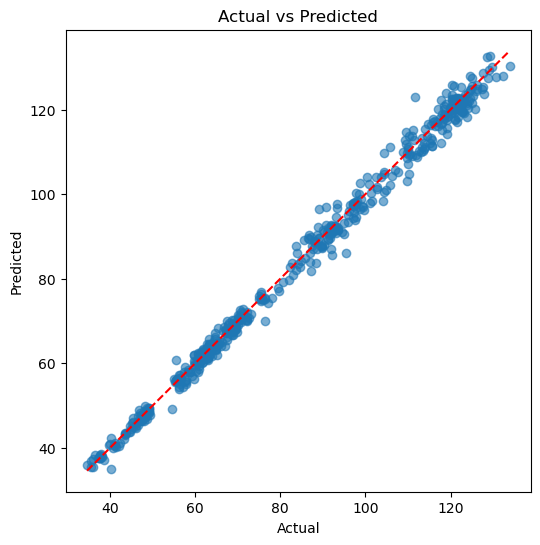

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred1, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [19]:
import joblib 
joblib.dump(lr, "NFLX.pkl")
model = joblib.load("NFLX.pkl")